# AEJxLPL (Auroral electrojets LC)

> Abstract: Access to the AEBS products ("Auroral Electrojet and auroral Boundaries estimated from Swarm observations"). These are a family of L2 (fast-track) products: `AEJxLPL`, `AEJxLPS`, `AEJxPBL`, `AEJxPBS`, `AOBxFAC`. The products provide latitude profiles of auroral electrojet currents from two methods - the "line current" (LC) and "Spherical Elementary Current Systems" (SECS) - as well as the locations of current maxima and minima and the boundaries of the current systems determined by each method, and the auroral oval boundaries determined from FAC observations.

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.12.0
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl

request = SwarmRequest()

## AEBS product information

These comprise five products:  
`AEJxLPL`: Auroral electrojets (AEJ) - Latitude profiles (LP) - Line current method (L)  
`AEJxLPS`: Auroral electrojets (AEJ) - Latitude profiles (LP) - SECS method (S)  
`AEJxPBL`: Auroral electrojets (AEJ) - Peaks and boundaries (PB) - Line current method (L)  
`AEJxPBS`: Auroral electrojets (AEJ) - Peaks and boundaries (PB) - SECS method (S)  
`AOBxFAC`: Auroral oval boundaries (AOB) - from FAC method  

These products are updated on a daily basis through the fast-track Swarm processing chain and are defined along the orbits of each Swarm spacecraft.

The LC method produces only horizontal sheet current density (2D) while the SECS method produces both the horizontal sheet current density and the radial current density (3D) as well as a prediction for the satellite ground track location experiencing the greatest magnetic disturbance.

*For the `LPL` (line current) products:*  
Horizontal current densities are given both in the NEC (*geographic*) frame (`J_NE` - North/East components) and the QD (*quasi-dipole*) frame (`J_QD`).

*For the `LPS` (SECS) products:*  
The horizontal current densities are decomposed into *curl-free* (CF) and *divergence-free* (DF) parts and expressed in both the NEC and semi-QD frames: `J_CF_NE`, `J_DF_NE`, `J_CF_SemiQD`, `J_DF_SemiQD`. The radial current density is also given in the semi-QD frame: `J_R`.

The `PBL` and `PBS` products contain the current system peaks and boundaries determined from each of `LPL` and `LPS` respectively. The `PBS` product also contains a prediction for the location and size of the peak ground magnetic disturbance.

Documentation:
- Not yet public but should appear at https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions
- ref SW‐DS‐DTU‐GS‐003_AEBS_PDD

Details on implementation in VirES and more demos:
- https://github.com/pacesm/jupyter_notebooks/tree/master/AEBS

The layout of these data is quite complex and the original data are mapped to variables within VirES as detailed in:  
https://github.com/pacesm/jupyter_notebooks/blob/master/AEBS/AEBS_00_data_access.ipynb

You can also see an overview of the collection and parameter naming in VirES at https://viresclient.readthedocs.io/en/latest/available_parameters.html#collections

## Example with the AEJALPL: J_QD time series

### Check available data variables (AEJ_LPL, AEJ_LPL:Quality, and AEJ_PBL product type)

In [3]:
request.available_collections("AEJ_LPL", details=False)

{'AEJ_LPL': ['SW_OPER_AEJALPL_2F', 'SW_OPER_AEJBLPL_2F', 'SW_OPER_AEJCLPL_2F']}

In [4]:
request.available_measurements("SW_OPER_AEJALPL_2F")

['Latitude_QD', 'Longitude_QD', 'MLT_QD', 'J_NE', 'J_QD']

In [5]:
request.available_collections("AEJ_LPL:Quality", details=False)

{'AEJ_LPL:Quality': ['SW_OPER_AEJALPL_2F:Quality',
  'SW_OPER_AEJBLPL_2F:Quality',
  'SW_OPER_AEJCLPL_2F:Quality']}

In [6]:
request.available_measurements("SW_OPER_AEJALPL_2F:Quality")

['RMS_misfit', 'Confidence']

In [7]:
request.available_collections("AEJ_PBL", details=False)

{'AEJ_PBL': ['SW_OPER_AEJAPBL_2F', 'SW_OPER_AEJBPBL_2F', 'SW_OPER_AEJCPBL_2F']}

In [8]:
request.available_measurements("SW_OPER_AEJAPBL_2F")

['Latitude_QD', 'Longitude_QD', 'MLT_QD', 'J_QD', 'Flags', 'PointType']

### Fetch the three collections: LPL, LPL:Quality, and PBL

In [9]:
start_time = dt.datetime(2015, 6, 1)
end_time = dt.datetime(2015, 6, 8)
spacecraft = 'A'
auxiliaries = ['OrbitNumber', 'QDLat', 'QDOrbitDirection', 'MLT', 'Kp']

# Fetch LPL
request.set_collection(f'SW_OPER_AEJ{spacecraft}LPL_2F')
request.set_products(
    measurements=['J_NE', 'J_QD'],
    auxiliaries=auxiliaries
)
data = request.get_between(start_time, end_time)
ds_lpl = data.as_xarray()
# Fetch LPL Quality
request.set_collection(f'SW_OPER_AEJ{spacecraft}LPL_2F:Quality')
request.set_products(
    measurements=['RMS_misfit', 'Confidence'],
)
data = request.get_between(start_time, end_time)
ds_lplq = data.as_xarray()
# Fetch PBL
request.set_collection(f'SW_OPER_AEJ{spacecraft}PBL_2F')
request.set_products(
    measurements=['PointType', 'Flags'],
    auxiliaries=auxiliaries
)
data = request.get_between(start_time, end_time)
ds_pbl = data.as_xarray()

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (1.147MB)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.038MB)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.155MB)

In [10]:
print("ds_lpl:\n", ds_lpl, "\n")
print("ds_lplq:\n", ds_lplq, "\n")
print("ds_pbl:\n", ds_pbl)

ds_lpl:
 <xarray.Dataset>
Dimensions:           (Timestamp: 14548, NE: 2)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 2015-06-01T00:00:15.68864051...
  * NE                (NE) <U1 'N' 'E'
Data variables:
    Spacecraft        (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    J_NE              (Timestamp, NE) float64 55.29 -7.479 59.79 ... 1.804 18.01
    QDOrbitDirection  (Timestamp) int8 1 1 1 1 1 1 1 1 ... -1 -1 -1 -1 -1 -1 -1
    QDLat             (Timestamp) float64 -77.66 -77.26 -76.8 ... 53.24 52.09
    Kp                (Timestamp) float64 1.667 1.667 1.667 ... 3.0 3.0 3.0
    OrbitNumber       (Timestamp) int32 8512 8512 8512 8512 ... 8620 8620 8620
    MLT               (Timestamp) float64 17.6 17.32 17.05 ... 0.6985 0.685
    Longitude         (Timestamp) float64 178.7 179.9 -179.2 ... 0.05097 0.1309
    Latitude          (Timestamp) float64 -79.2 -78.22 -77.24 ... 57.1 56.1 55.1
    J_QD              (Timestamp) float64 -55.79 -61.43 -69.57 ..

### Reconstruct `ds_pbl` into a more manageable form
Split `PointType` apart into separate boolean arrays, one for each point type

For more info on `PointType`, see:
https://nbviewer.jupyter.org/github/pacesm/jupyter_notebooks/blob/master/AEBS/AEBS_00_data_access.ipynb#AEJxPBL-product

In [11]:
# Meaning of PointType
PointType_meanings = {
    "WEJ_peak": 0,  # minimum
    "EEJ_peak": 1,  # maximum
    "WEJ_eq_bound_s": 2,  # equatorward (pair start)
    "EEJ_eq_bound_s": 3,
    "WEJ_po_bound_s": 6,  # poleward
    "EEJ_po_bound_s": 7,
    "WEJ_eq_bound_e": 10,  # equatorward (pair end)
    "EEJ_eq_bound_e": 11,
    "WEJ_po_bound_e": 14,  # poleward
    "EEJ_po_bound_e": 15,
}
# Add new data variables (boolean Type) according to the dictionary above
ds_pbl = ds_pbl.assign(
    {name: ds_pbl["PointType"] == PointType_meanings[name]
     for name in PointType_meanings.keys()}
)
ds_pbl

<xarray.Dataset>
Dimensions:           (Timestamp: 2202)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 2015-06-01T00:02:05.89810944...
Data variables: (12/20)
    Spacecraft        (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    QDOrbitDirection  (Timestamp) int8 1 1 1 1 1 1 1 1 ... 1 1 -1 -1 -1 -1 -1 -1
    QDLat             (Timestamp) float64 -73.68 -71.39 -68.89 ... 58.9 50.93
    Kp                (Timestamp) float64 1.667 1.667 1.667 ... 3.0 3.0 3.0
    OrbitNumber       (Timestamp) int32 8512 8512 8512 8512 ... 8620 8620 8620
    MLT               (Timestamp) float64 15.97 15.51 15.15 ... 0.7821 0.6724
    ...                ...
    WEJ_po_bound_s    (Timestamp) bool False False False ... False False False
    EEJ_po_bound_s    (Timestamp) bool True False False ... True False False
    WEJ_eq_bound_e    (Timestamp) bool False False False ... False False False
    EEJ_eq_bound_e    (Timestamp) bool False False True ... False False True
    WEJ_po_bound_e    (Timestamp) bool False False False ... False False False
    EEJ_po_bound_e    (Timestamp) bool False False False ... False False False
Attributes:
    Sources:         ['GFZ_KP_20150101T013000_20151231T223000_20230822T171817...
    MagneticModels:  []
    AppliedFilters:  []

### Merge (`ds_lpl`, `ds_pbl`) into one `ds`

`ds_pbl` contains duplicate Timestamp entries because some points in the time series contain more than one identified PointType. This is a problem for straightforward merging with `ds_lpl`. This can be worked around with this strategy:
1. Create a new dataset from the newly created PointType arrays, without the repeating timestamps
2. Merge this with the LPL dataset - this is an outer merge since the PBL contains timestamps that don't appear in the LPL data

In [12]:
def drop_duplicate_times(_ds):
    _, index = np.unique(_ds['Timestamp'], return_index=True)
    return _ds.isel(Timestamp=index)

def merge_attrs(_ds1, _ds2):
    attrs = {"Sources":[], "MagneticModels":[], "AppliedFilters":[]}
    for item in ["Sources", "MagneticModels", "AppliedFilters"]:
        attrs[item] = list(set(_ds1.attrs[item] + _ds2.attrs[item]))
    return attrs

# Create new dataset from just the newly created PointType arrays
# This is created on a non-repeating Timestamp coordinate
ds = xr.Dataset(
    {name: ds_pbl[name].where(ds_pbl[name], drop=True)
     for name in PointType_meanings.keys()}
)
# Merge in the positional and auxiliary data
data_vars = list(set(ds_pbl.data_vars).difference(set(PointType_meanings.keys())))
data_vars.remove("PointType")
ds = ds.merge(
    (ds_pbl[data_vars]
        .pipe(drop_duplicate_times))
)
# Merge together with the LPL data
# Note that the Timestamp coordinates aren't equal

# Separately merge data with matching and missing time sample points in ds_lpl
idx_present = list(set(ds["Timestamp"].values).intersection(set(ds_lpl["Timestamp"].values)))
idx_missing = list(set(ds["Timestamp"].values).difference(set(ds_lpl["Timestamp"].values)))
# Override prioritises the first dataset (ds_lpl) where there are conflicts
ds2 = ds_lpl.merge(ds.sel(Timestamp=idx_present), join="outer", compat="override")
ds2 = ds2.merge(ds.sel(Timestamp=idx_missing), join="outer")
# Update the metadata
ds2.attrs = merge_attrs(ds_lpl, ds_pbl)

# Switch the point type arrays to uint8 or bool for performance?
# But the .where operations later cast them back to float64 since gaps are filled with nan
for name in PointType_meanings.keys():
    ds2[name] = ds2[name].astype("uint8").fillna(False)
    # ds2[name] = ds2[name].fillna(False).astype(bool)

ds = ds2
ds

/opt/conda/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:203: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


<xarray.Dataset>
Dimensions:           (Timestamp: 14950, NE: 2)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 2015-06-01T00:00:15.68864051...
  * NE                (NE) <U1 'N' 'E'
Data variables: (12/21)
    Spacecraft        (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    J_NE              (Timestamp, NE) float64 55.29 -7.479 59.79 ... nan nan
    QDOrbitDirection  (Timestamp) float32 1.0 1.0 1.0 1.0 ... -1.0 -1.0 -1.0
    QDLat             (Timestamp) float64 -77.66 -77.26 -76.8 ... 52.09 50.93
    Kp                (Timestamp) float64 1.667 1.667 1.667 ... 3.0 3.0 3.0
    OrbitNumber       (Timestamp) float64 8.512e+03 8.512e+03 ... 8.62e+03
    ...                ...
    EEJ_po_bound_s    (Timestamp) uint8 0 0 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 0 0
    WEJ_eq_bound_e    (Timestamp) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    EEJ_eq_bound_e    (Timestamp) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 1
    WEJ_po_bound_e    (Timestamp) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    EEJ_po_bound_e    (Timestamp) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    Flags             (Timestamp) float32 nan nan nan nan ... nan nan nan 132.0
Attributes:
    Sources:         ['SW_OPER_AEJALPL_2F_20150607T000000_20150607T235959_020...
    MagneticModels:  []
    AppliedFilters:  []

We can extract locations within `ds` where a certain point type is identified, and plot them:

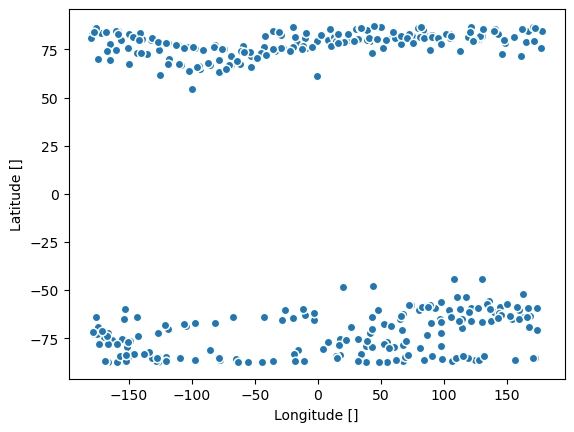

In [13]:
(
    ds.where(ds["EEJ_peak"], drop=True)
      .plot.scatter(y="Latitude", x="Longitude")# hue="MLT", cmap="twilight_shifted")
);

### Append the PBL Flags information into the LPL:Quality dataset to use as a lookup table

In [14]:
ds_lplq = ds_lplq.assign(
    Flags_PBL=
    ds_pbl["Flags"]
    .pipe(drop_duplicate_times)
    .reindex_like(ds_lplq, method="nearest"),
)
ds_lplq

## A particular time can be searched for like:
# t = ds_lpl["Timestamp"].isel(Timestamp=0).values
# ds_lplq.sel(Timestamp=t, method="nearest")

<xarray.Dataset>
Dimensions:     (Timestamp: 367)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-06-01T00:05:37 ... 2015-06-07...
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    RMS_misfit  (Timestamp) float64 0.343 0.5874 0.5466 ... 0.1878 1.773 0.5764
    Confidence  (Timestamp) float64 0.9616 0.9693 0.9793 ... 0.9397 0.9611
    Flags_PBL   (Timestamp) uint16 592 528 264 196 1120 0 ... 0 0 64 196 0 132
Attributes:
    Sources:         ['SW_OPER_AEJALPL_2F_20150531T000000_20150531T235959_020...
    MagneticModels:  []
    AppliedFilters:  []

### Overview of the week accessed

NB the coloured plot suffers from overplotting lines as we have not separated the ascending/descending sectors of the passes over the poles.

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))
axes[0].plot(ds["Timestamp"], ds["J_QD"])
axes[0].set_ylabel("J_QD")
cmap = mpl.cm.RdBu
norm = plt.Normalize(-200, 200)
axes[1].scatter(
    x=ds["Timestamp"].values, y=ds["Latitude"].values, c=ds["J_QD"].values,
    s=1, cmap=cmap, norm=norm
)
ax_cbar = fig.add_axes([0.95, 0.4, 0.02, 0.2])
mpl.colorbar.ColorbarBase(
    ax_cbar, cmap=cmap, norm=norm, orientation="vertical", label="J_QD"
)
axes[1].set_ylabel("Latitude")
_da_kp = ds["Kp"].dropna(dim="Timestamp")
axes[2].plot(_da_kp["Timestamp"], _da_kp)
axes[2].set_ylabel("Kp");

### Orbit-by-orbit plot of one day

In [16]:
# Bit numbers which indicate non-nominal state
# Check SW-DS-DTU-GS-003_AEBS_PDD for details
BITS_PBL_FLAGS_EEJ_MINOR = (2, 3, 6)
BITS_PBL_FLAGS_WEJ_MINOR = (4, 5, 6)
BITS_PBL_FLAGS_EEJ_BAD = (0, 7, 8, 11)
BITS_PBL_FLAGS_WEJ_BAD = (1, 9, 10, 12)

def check_PBL_Flags(flags=0b0, EJ_type="WEJ"):
    """Return "good", "poor", or "bad" depending on status"""
    def _check_bits(bitno_set):
        return any(flags & (1 << bitno) for bitno in bitno_set)
    if EJ_type == "WEJ":
        if _check_bits(BITS_PBL_FLAGS_WEJ_BAD):
            return "bad"
        elif _check_bits(BITS_PBL_FLAGS_WEJ_MINOR):
            return "poor"
        else:
            return "good"
    elif EJ_type == "EEJ":
        if _check_bits(BITS_PBL_FLAGS_EEJ_BAD):
            return "bad"
        elif _check_bits(BITS_PBL_FLAGS_EEJ_MINOR):
            return "poor"
        else:
            return "good"

In [17]:
glyphs = {
    "WEJ_peak": {"marker": 'v', "color":'tab:red'},  # minimum
    "EEJ_peak": {"marker": '^', "color":'tab:purple'},  # maximum
    "WEJ_eq_bound_s": {"marker": '>', "color":'black'},  # equatorward (pair start)
    "EEJ_eq_bound_s": {"marker": '>', "color":'black'},
    "WEJ_po_bound_s": {"marker": '>', "color":'black'},  # poleward
    "EEJ_po_bound_s": {"marker": '>', "color":'black'},
    "WEJ_eq_bound_e": {"marker": '<', "color":'black'},  # equatorward (pair end)
    "EEJ_eq_bound_e": {"marker": '<', "color":'black'},
    "WEJ_po_bound_e": {"marker": '<', "color":'black'},  # poleward
    "EEJ_po_bound_e": {"marker": '<', "color":'black'},
}

def plot_stack(ds, hemisphere="North"):
    if hemisphere == "North":
        ds = ds.where(ds["Latitude"]>0, drop=True)
    elif hemisphere == "South":
        ds = ds.where(ds["Latitude"]<0, drop=True)
    # Generate plot with split by columns: ascending/descending to/from pole
    #                          by rows: successive orbits
    # Skip when no data available
    if len(ds["Timestamp"]) == 0:
        return None, None
    fig, axes = plt.subplots(
        nrows=len(ds.groupby("OrbitNumber")), ncols=2, sharex="col", sharey="all",
        figsize=(10, 20)
    )
    max_ylim = np.max(np.abs(ds["J_QD"]))
    # Loop through each orbit
    for i, (_, ds_orbit) in enumerate(ds.groupby("OrbitNumber")):
        if hemisphere == "North":
            ds_orb_asc = ds_orbit.where(ds_orbit["QDOrbitDirection"] == 1, drop=True)
            ds_orb_desc = ds_orbit.where(ds_orbit["QDOrbitDirection"] == -1, drop=True)
        if hemisphere == "South":
            ds_orb_asc = ds_orbit.where(ds_orbit["QDOrbitDirection"] == -1, drop=True)
            ds_orb_desc = ds_orbit.where(ds_orbit["QDOrbitDirection"] == 1, drop=True)
        # Loop through ascending and descending sections
        for j, _ds in enumerate((ds_orb_asc, ds_orb_desc)):
            # Line plot of current strength
            axes[i, j].plot(
                _ds["QDLat"], _ds["J_QD"],
                color="tab:blue", marker=".", linestyle=""
            )
            # Plot glyphs at the peaks and boundaries locations
            for name in glyphs.keys():
                __ds = _ds.where(_ds[name], drop=True)
                try:
                    for qdlat in __ds["QDLat"]:
                        axes[i, j].plot(
                            qdlat, 0,
                            marker=glyphs[name]["marker"], color=glyphs[name]["color"]
                        )
                except Exception:
                    pass
            # Identify Quality and Flags info
            # Use either the start time of the section or the end, depending on asc or desc
            index = 0 if j == 0 else -1
            t = _ds["Timestamp"].isel(Timestamp=index).values
            _ds_qualflags = ds_lplq.sel(Timestamp=t, method="nearest")
            pbl_flags = int(_ds_qualflags["Flags_PBL"].values)
            lpl_rms_misfit = float(_ds_qualflags["RMS_misfit"].values)
            lpl_confidence = float(_ds_qualflags["Confidence"].values)
            # Shade WEJ and EEJ regions, only if well-defined
            # def _shade_EJ_region(_ds=None, EJ="WEJ", color="tab:red", alpha=0.3):
            wej_status = check_PBL_Flags(pbl_flags, "WEJ")
            eej_status = check_PBL_Flags(pbl_flags, "EEJ")
            if wej_status in ["good", "poor"]:
                alpha = 0.3 if wej_status == "good" else 0.1
                try:
                    WEJ_left = _ds.where(
                        (_ds["WEJ_eq_bound_s"] == 1) | (_ds["WEJ_po_bound_s"] == 1), drop=True)
                    WEJ_right = _ds.where(
                        (_ds["WEJ_eq_bound_e"] == 1) | (_ds["WEJ_po_bound_e"] == 1), drop=True)
                    x1 = WEJ_left["QDLat"][0]
                    x2 = WEJ_right["QDLat"][0]
                    axes[i, j].fill_betweenx(
                        [-max_ylim, max_ylim], [x1, x1], [x2, x2], color="tab:red", alpha=alpha)
                except Exception:
                    pass
            if eej_status in ["good", "poor"]:
                alpha = 0.3 if eej_status == "good" else 0.15
                try:
                    EEJ_left = _ds.where(
                        (_ds["EEJ_eq_bound_s"] == 1) | (_ds["EEJ_po_bound_s"] == 1), drop=True)
                    EEJ_right = _ds.where(
                        (_ds["EEJ_eq_bound_e"] == 1) | (_ds["EEJ_po_bound_e"] == 1), drop=True)
                    x1 = EEJ_left["QDLat"][0]
                    x2 = EEJ_right["QDLat"][0]
                    axes[i, j].fill_betweenx(
                        [-max_ylim, max_ylim], [x1, x1], [x2, x2], color="tab:purple", alpha=alpha)
                except Exception:
                    pass
            # Write the LPL:Quality and PBL Flags info
            ha = "right" if j == 0 else "left"
            textx = 0.98 if j == 0 else 0.02
            axes[i, j].text(
                textx, 0.95,
                f"RMS Misfit {np.round(lpl_rms_misfit, 2)}; Confidence {np.round(lpl_confidence, 2)}",
                transform=axes[i, j].transAxes, verticalalignment="top", horizontalalignment=ha
            )
            axes[i, j].text(
                textx, 0.05,
                f"PBL Flags {pbl_flags:013b}",
                transform=axes[i, j].transAxes, verticalalignment="bottom", horizontalalignment=ha
            )
        # Write the start/end time and MLT of the section, and the orbit number
        def _format_utc(t):
            return f"UTC {t.strftime('%H:%M')}"
        def _format_mlt(mlt):
            hour, fraction = divmod(mlt, 1)
            t = dt.time(int(hour), minute=int(60*fraction))
            return f"MLT {t.strftime('%H:%M')}"
        # Left part (section starting UTC, MLT, OrbitNumber)
        time_s = pd.to_datetime(ds_orb_asc["Timestamp"].isel(Timestamp=0).data)
        mlt_s = ds_orb_asc["MLT"].dropna(dim="Timestamp").isel(Timestamp=0).data
        orbit_number = int(ds_orb_asc["OrbitNumber"].isel(Timestamp=0).data)
        axes[i, 0].text(
            0.01, 0.95, f"{_format_utc(time_s)}\n{_format_mlt(mlt_s)}",
            transform=axes[i, 0].transAxes, verticalalignment="top"
        )
        axes[i, 0].text(
            0.01, 0.05, f"Orbit {orbit_number}",
            transform=axes[i, 0].transAxes, verticalalignment="bottom"
        )
        # Right part (section ending UTC, MLT)
        time_e = pd.to_datetime(ds_orb_desc["Timestamp"].isel(Timestamp=-1).data)
        mlt_e = ds_orb_desc["MLT"].dropna(dim="Timestamp").isel(Timestamp=-1).data
        axes[i, 1].text(
            0.99, 0.95, f"{_format_utc(time_e)}\n{_format_mlt(mlt_e)}",
            transform=axes[i, 1].transAxes, verticalalignment="top", horizontalalignment="right"
        )
    # Extra config of axes and figure text
    axes[0, 0].set_ylim(-max_ylim, max_ylim)
    if hemisphere == "North":
        axes[0, 0].set_xlim(50, 90)
        axes[0, 1].set_xlim(90, 50)
    elif hemisphere == "South":
        axes[0, 0].set_xlim(-50, -90)
        axes[0, 1].set_xlim(-90, -50)
    for ax in axes.flatten():
        ax.grid()
    axes[-1, 0].set_xlabel("QD Latitude")
    axes[-1, 0].set_ylabel("Eastward electrojet\n[ A.km$^{-1}$ ]")
    time = pd.to_datetime(ds["Timestamp"].isel(Timestamp=0).data)
    spacecraft = ds["Spacecraft"].dropna(dim="Timestamp").isel(Timestamp=0).data
    fig.text(
        0.5, 0.9, f"{time.strftime('%Y-%m-%d')}\nSwarm {spacecraft}\n{hemisphere}",
        transform=fig.transFigure, horizontalalignment="center",
    )
    fig.subplots_adjust(wspace=0, hspace=0)
    return fig, axes

def plot_day(ds, day="20150101", hemisphere="North"):
    ds = ds.sel(Timestamp=day)
    fig, axes = plot_stack(ds, hemisphere)
    return fig, axes

`plot_stack()` can be used to build the plot from a given dataset, separately for each hemisphere. `plot_day()` selects and plots a particular day.

Consecutive orbits are shown in consecutive rows, centred over the magnetic pole (defined by quasi-dipole latitude). The starting and ending times (UTC and MLT) of the orbital section are shown at the left and right. Westward (WEJ) and Eastward (EEJ) electrojet extents and peak intensities are indicated:
- Blue dots: Estimated current density, J
- Red/Purple shaded region: WEJ/EEJ extent (boundaries marked by black triangles)
- Red/Purple triangles: Locations of peak WEJ/EEJ intensity

In [18]:
fig, axes = plot_day(ds, day="20150601", hemisphere="North")